### Dataset to use - change this value to analyze a different data set

In [1]:
dataset = 'twenty_complete_new_info'

In [2]:
from analysis import check_folder
check_folder.check_folder(dataset)

[]

In [3]:
import pandas as pd

def order_tpr_fpr(fprs, tprs):
    df = pd.DataFrame(dict(fpr=fprs, tpr=tprs))
    df.sort_values('fpr', ascending=False)
    df.drop_duplicates(subset='fpr', keep='last', inplace=True)
    return df
    
    
a = order_tpr_fpr([.2, .1, .2], [.3, .2, .4])

### Load in parent probabilities and rates

In [4]:
from analysis import check_gies, check_samples
import numpy as np
import itertools as itr

In [5]:
dag_folders = check_gies.get_dag_folders(dataset)
true_dags = check_gies.get_true_dags(dag_folders)
print('loaded DAGs')
parent_probs_by_dag = check_gies.get_parent_probs_by_dag(dag_folders, 9)
print('Computed parent probabilities')

loaded DAGs
/home/ubuntu/active_learning/new/data/twenty_complete_new_info/dags/dag23
/home/ubuntu/active_learning/new/data/twenty_complete_new_info/dags/dag19
/home/ubuntu/active_learning/new/data/twenty_complete_new_info/dags/dag0
/home/ubuntu/active_learning/new/data/twenty_complete_new_info/dags/dag1
/home/ubuntu/active_learning/new/data/twenty_complete_new_info/dags/dag20
/home/ubuntu/active_learning/new/data/twenty_complete_new_info/dags/dag32
/home/ubuntu/active_learning/new/data/twenty_complete_new_info/dags/dag5
/home/ubuntu/active_learning/new/data/twenty_complete_new_info/dags/dag31
/home/ubuntu/active_learning/new/data/twenty_complete_new_info/dags/dag29
/home/ubuntu/active_learning/new/data/twenty_complete_new_info/dags/dag34
/home/ubuntu/active_learning/new/data/twenty_complete_new_info/dags/dag14
/home/ubuntu/active_learning/new/data/twenty_complete_new_info/dags/dag7
/home/ubuntu/active_learning/new/data/twenty_complete_new_info/dags/dag43
/home/ubuntu/active_learning/n

### Load the rates DataArray, a 7-dimensional tensor mapping each strategy (strategy name, n, b, k) and significance level to the value of a rate for all DAGs

In [6]:
strategy_names = ['entropy', 'random']
ks = [1, 2]
bs = [1, 2]
ns = [256, 1024]
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [7]:
counts_da = check_samples.count_samples(dataset, strategy_names, ks, bs, ns)

In [8]:
rates_da = check_gies.get_rates_data_array(
    parent_probs_by_dag,
    true_dags,
    target=9,
    strategy_names=strategy_names,
    ks=ks,
    bs=bs,
    ns=ns,
    alphas=np.linspace(0, 1, 11)
)
print(rates_da.dims)

random,n=256,b=2,k=1
entropy,n=1024,b=1,k=2
random,n=1024,b=2,k=2
entropy,n=256,b=1,k=1
random,n=1024,b=1,k=2
entropy,n=256,b=2,k=1
entropy,n=1024,b=1,k=1
entropy,n=256,b=1,k=2
random,n=1024,b=2,k=1
random,n=256,b=2,k=2
entropy,n=256,b=2,k=2
entropy,n=1024,b=2,k=1
random,n=256,b=1,k=1
entropy,n=1024,b=2,k=2
random,n=256,b=1,k=2
random,n=1024,b=1,k=1
random,n=256,b=2,k=1
entropy,n=1024,b=1,k=2
random,n=1024,b=2,k=2
entropy,n=256,b=1,k=1
random,n=1024,b=1,k=2
entropy,n=256,b=2,k=1
entropy,n=1024,b=1,k=1
entropy,n=256,b=1,k=2
random,n=1024,b=2,k=1
random,n=256,b=2,k=2
entropy,n=256,b=2,k=2
entropy,n=1024,b=2,k=1
random,n=256,b=1,k=1
entropy,n=1024,b=2,k=2
random,n=256,b=1,k=2
random,n=1024,b=1,k=1
random,n=256,b=2,k=1
entropy,n=1024,b=1,k=2
random,n=1024,b=2,k=2
entropy,n=256,b=1,k=1
random,n=1024,b=1,k=2
entropy,n=256,b=2,k=1
entropy,n=1024,b=1,k=1
entropy,n=256,b=1,k=2
random,n=1024,b=2,k=1
random,n=256,b=2,k=2
entropy,n=256,b=2,k=2
entropy,n=1024,b=2,k=1
random,n=256,b=1,k=1
entropy,n=

### Plot curves for each strategy

In [9]:
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
%matplotlib inline
plt.rcParams["figure.figsize"] =(20,12)
sns.set(font_scale=1.5)

In [10]:

linestyles = ['solid', 'dashed', 'dotted']
colors = sns.color_palette()
sample_handles = [
    mlines.Line2D([0], [0], color='k', linestyle=linestyle, label=n) 
    for n, linestyle in zip(ns, linestyles)
]
strat_handles = [
    mpatches.Patch(facecolor=color, label=strat)
    for strat, color in zip(strategy_names, colors)
]

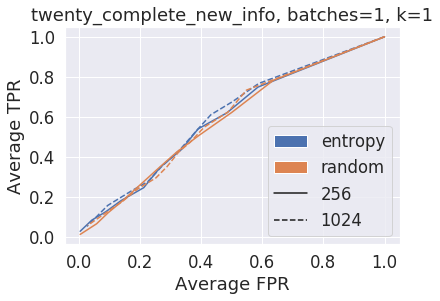

In [11]:
plt.clf()

rate_avgs_da = rates_da.mean(dim='dag')
b=1
k=1
for strategy, color in zip(strategy_names, colors):
    for n, linestyle in zip(ns, linestyles):
        strat_avg_tprs = rate_avgs_da.sel(strategy=strategy, b=b, k=k, n=n, rate='tpr').values
        strat_avg_fprs = rate_avgs_da.sel(strategy=strategy, b=b, k=k, n=n, rate='fpr').values
        tpr_fpr_df = order_tpr_fpr(strat_avg_fprs, strat_avg_tprs)
        plt.plot(tpr_fpr_df['fpr'], tpr_fpr_df['tpr'], linestyle=linestyle, color=color)

plt.legend(
    handles=strat_handles + sample_handles
)
plt.title(dataset + ', batches=%s, k=%s' % (b, k))
plt.xlabel('Average FPR')
plt.ylabel('Average TPR');

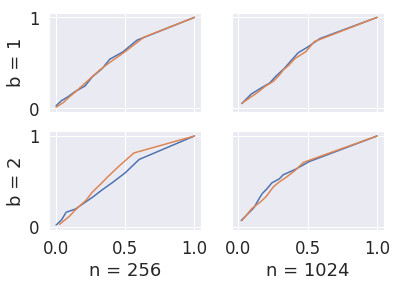

In [29]:
fig, ax = plt.subplots(len(bs), len(ns), sharey=True, sharex=True)
k=1
for (b_ix, b), (n_ix, n) in itr.product(list(enumerate(bs)), list(enumerate(ns))):
    for strategy, color in zip(strategy_names, colors):
        avg_rates = rate_avgs_da.sel(strategy=strategy, b=b, k=k, n=n)
        tpr_fpr_df = order_tpr_fpr(avg_rates.sel(rate='fpr').values, avg_rates.sel(rate='tpr').values)
        ax[b_ix, n_ix].plot(tpr_fpr_df['fpr'], tpr_fpr_df['tpr'], color=color)
        if b_ix == len(bs)-1:
            ax[b_ix, n_ix].set_xlabel('n = %s' % n)
        if n_ix == 0:
            ax[b_ix, n_ix].set_ylabel('b = %s' % b)


In [13]:
from scipy.stats import entropy

In [14]:
n = 256
k = 2
b = 2

c_e = counts_da.sel(strategy='entropy', k=k, b=b, n=n)/n
c_e

<xarray.DataArray (dag: 50, intervened_node: 20)>
array([[0.234375, 0.      , 0.      , ..., 0.      , 0.230469, 0.      ],
       [0.226562, 0.      , 0.273438, ..., 0.      , 0.      , 0.      ],
       [0.222656, 0.      , 0.      , ..., 0.      , 0.      , 0.226562],
       ...,
       [0.      , 0.      , 0.25    , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.632812, 0.      , ..., 0.      , 0.261719, 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]])
Coordinates:
  * dag              (dag) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * intervened_node  (intervened_node) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ...
    strategy         <U7 'entropy'
    n                int32 256
    k                int32 2
    b                int32 2

In [15]:
c_r = counts_da.sel(strategy='random', k=k, b=b, n=n)/n

In [16]:
ent_e = entropy(c_e.T)
ent_r = entropy(c_r.T)

In [17]:
ent_e

array([1.38378973, 1.38311667, 1.38109715, 1.37023238, 1.28525867,
       1.38421741, 1.37637382, 1.38574484, 1.07581263, 1.38568381,
       1.37495582, 1.00669957, 1.07998804, 1.363864  , 1.37992158,
       1.38568381, 1.36830189, 1.05322336, 1.37123747, 0.98832395,
       1.1544344 , 1.2000556 , 0.7892772 , 1.0085297 , 1.38507298,
       1.37592563, 1.3774176 , 1.02779916, 1.38384969, 1.35779644,
       1.37584625, 1.38550066, 0.86653106, 1.31038634, 1.05646868,
       0.80872176, 1.37270675, 0.94060992, 1.34530369, 1.01273062,
       1.03684422, 1.37203369, 1.30506492, 1.3471127 , 0.99933853,
       0.93630837, 1.38617229, 1.35887277, 0.8776282 , 1.16938168])

In [18]:
ent_e.mean()

1.2221449618704592

In [19]:
ent_r

array([1.38629436, 1.38629436, 1.38629436, 1.38629436, 1.38629436,
       1.38629436, 1.38629436, 1.38629436, 1.38629436, 1.03972077,
       1.38629436, 1.38629436, 1.38629436, 1.38629436, 1.38629436,
       1.38629436, 1.38629436, 1.03972077, 1.38629436, 1.03972077,
       1.38629436, 1.03972077, 1.38629436, 1.38629436, 1.38629436,
       1.38629436, 1.38629436, 1.38629436, 1.38629436, 1.38629436,
       1.03972077, 1.38629436, 1.38629436, 1.38629436, 1.38629436,
       1.03972077, 1.38629436, 1.38629436, 1.38629436, 1.38629436,
       1.38629436, 1.38629436, 1.03972077, 1.38629436, 1.38629436,
       1.03972077, 1.03972077, 1.38629436, 1.38629436, 1.38629436])

In [20]:
ent_r.mean()

1.3239111148694958

In [21]:
np.log(4)

1.3862943611198906

In [22]:
import random
from collections import Counter

def random_choices(p, k):
    c = Counter(random.choices(list(range(p)), k=k))
    arr = np.zeros(p)
    for i, val in c.items():
        arr[i] += val
    return arr/arr.sum()


In [23]:
for k in [20, 40, 100, 200]:
    print(entropy(random_choices(20, k)))

2.458204432785574
2.8655977892817712
2.86983372253712
2.95215630502302


In [24]:
entropy([.5, .5])

0.6931471805599453

In [25]:
np.log(2)

0.6931471805599453

In [26]:
c_e

<xarray.DataArray (dag: 50, intervened_node: 20)>
array([[0.234375, 0.      , 0.      , ..., 0.      , 0.230469, 0.      ],
       [0.226562, 0.      , 0.273438, ..., 0.      , 0.      , 0.      ],
       [0.222656, 0.      , 0.      , ..., 0.      , 0.      , 0.226562],
       ...,
       [0.      , 0.      , 0.25    , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.632812, 0.      , ..., 0.      , 0.261719, 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]])
Coordinates:
  * dag              (dag) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * intervened_node  (intervened_node) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ...
    strategy         <U7 'entropy'
    n                int32 256
    k                int32 2
    b                int32 2

In [27]:
counts_da.sel(strategy='entropy', k=1, b=1, n=256, dag=1)

<xarray.DataArray (intervened_node: 20)>
array([  0.,   0.,   0.,   0.,   0.,   0., 256.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])
Coordinates:
    dag              int32 1
  * intervened_node  (intervened_node) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ...
    strategy         <U7 'entropy'
    n                int32 256
    k                int32 1
    b                int32 1

In [28]:
counts_da.sel(strategy='random', k=2, b=2, n=256, dag=1)

<xarray.DataArray (intervened_node: 20)>
array([ 0.,  0., 64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       64., 64.,  0.,  0., 64.,  0.])
Coordinates:
    dag              int32 1
  * intervened_node  (intervened_node) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ...
    strategy         <U6 'random'
    n                int32 256
    k                int32 2
    b                int32 2